In [9]:
import pandas as pd

data = pd.read_csv("shelter-animal-outcomes/train.csv.gz")
data.head(10)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [10]:
data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A717388,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [13]:
print(data['AnimalType'].value_counts())
print(data['OutcomeType'].value_counts())
print(data['OutcomeSubtype'].value_counts())
print(data['SexuponOutcome'].value_counts())
print(data['AgeuponOutcome'].value_counts())
print(data['Breed'].value_counts())
print(data['Color'].value_counts())

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64
Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64
Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64
Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64
1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      

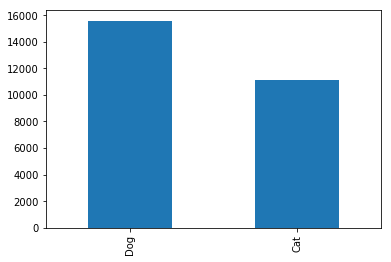

In [18]:
%matplotlib inline
data['AnimalType'].value_counts().plot.bar()

In [39]:
data['AgeNumeric']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[0].astype('float')
data['AgeString']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[1]
print(data['AgeNumeric'].head(500))
print(data['AgeString'].head())
print(data['AgeString'].value_counts())

0       1.0
1       1.0
2       2.0
3       3.0
4       2.0
5       1.0
6       3.0
7       3.0
8       5.0
9       1.0
10      2.0
11      2.0
12      4.0
13      2.0
14      1.0
15      3.0
16      3.0
17      2.0
18      2.0
19      1.0
20      2.0
21      1.0
22      2.0
23     10.0
24      2.0
25      1.0
26      6.0
27      5.0
28      2.0
29      7.0
       ... 
470     2.0
471     2.0
472     3.0
473     5.0
474     3.0
475    10.0
476     7.0
477     7.0
478     3.0
479     2.0
480     2.0
481     1.0
482     5.0
483     8.0
484     3.0
485     1.0
486     4.0
487     1.0
488     1.0
489     2.0
490     8.0
491     1.0
492     5.0
493     4.0
494     3.0
495     3.0
496     2.0
497     3.0
498    10.0
499     5.0
Name: AgeNumeric, Length: 500, dtype: float64
0     year
1     year
2    years
3    weeks
4    years
Name: AgeString, dtype: object
years     10874
months     8339
year       3969
weeks      1704
month      1281
days        332
week        146
day          66
Name: Ag

In [103]:
import pandas as pd

#Import data
data = pd.read_csv("shelter-animal-outcomes/train.csv.gz")

#Cleaning

#Drop NAs
data = data.drop(['OutcomeSubtype', 'Name'],axis=1).dropna()

#Code Age
data['AgeNumeric']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[0].astype('float')
data['AgeString']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[1]
data.loc[data['AgeString'].str[0]=='y' , 'AgeInDays'] = data['AgeNumeric']*365.25
data.loc[data['AgeString'].str[0]=='w' , 'AgeInDays'] = data['AgeNumeric']*7
data.loc[data['AgeString'].str[0]=='m' , 'AgeInDays'] = data['AgeNumeric']*(365.25/12)
data.loc[data['AgeString'].str[0]=='d' , 'AgeInDays'] = data['AgeNumeric']

#Code Colors
data["First_Color"] = data["Color"].str.split("/", n = 1, expand = True)[0]
data["Second_Color"] = data["Color"].str.split("/", n = 1, expand = True)[1]

# Code state and sex 
data["Intact"] = data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[0] 
data["Sex"]= data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[1]

#Date time stuff
data['date_year'] = data['DateTime'].str[0:4]
data['date_month'] = data['DateTime'].str[5:7]
data['date_day'] = data['DateTime'].str[8:10]

#Drop unnecessary vars
data = data.drop(['SexuponOutcome','AgeuponOutcome','AgeNumeric','AgeString','Color','DateTime'],axis=1)

data.head()




,AnimalID,OutcomeType,AnimalType,Breed,AgeInDays,First_Color,Second_Color,Intact,Sex,date_year,date_month,date_day
0,A671945,Return_to_owner,Dog,Shetland Sheepdog Mix,365.25,Brown,White,Neutered,Male,2014,02,12
1,A656520,Euthanasia,Cat,Domestic Shorthair Mix,365.25,Cream Tabby,None,Spayed,Female,2013,10,13
2,A686464,Adoption,Dog,Pit Bull Mix,730.50,Blue,White,Neutered,Male,2015,01,31
3,A683430,Transfer,Cat,Domestic Shorthair Mix,21.00,Blue Cream,None,Intact,Male,2014,07,11
4,A667013,Transfer,Dog,Lhasa Apso/Miniature Poodle,730.50,Tan,None,Neutered,Male,2013,11,15
